In [22]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df = pd.read_csv('D:\Machine_build_from\data\ecommerce_sales_34500.csv')

# EDA

In [24]:
df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male


In [25]:
# Tính toán thêm cột doanh thu sau giảm giá
df['total_amount'] = df['price'] * df['quantity'] * (1 - df['discount'])

In [26]:
df.describe()

,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.391632,0.049291,1.490725,4.814203,170.008493,6.152120,28.116505,43.474377
std,195.620477,0.069894,0.932270,1.242141,357.503026,2.389539,53.352947,14.980682
min,1.010000,0.000000,1.000000,3.000000,0.816000,0.000000,-6.200000,18.000000
25%,16.690000,0.000000,1.000000,4.000000,19.711500,4.420000,1.500000,31.000000
50%,45.660000,0.000000,1.000000,5.000000,56.821000,6.090000,10.550000,43.000000
75%,130.950000,0.100000,2.000000,6.000000,168.531000,7.830000,33.132500,56.000000
max,2930.470000,0.300000,5.000000,13.000000,12931.800000,15.650000,1536.170000,69.000000


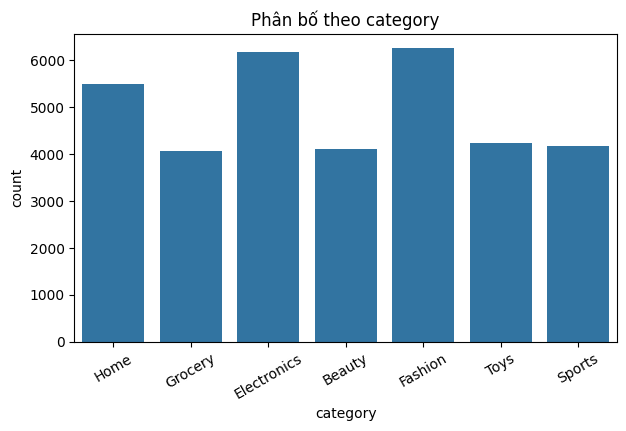

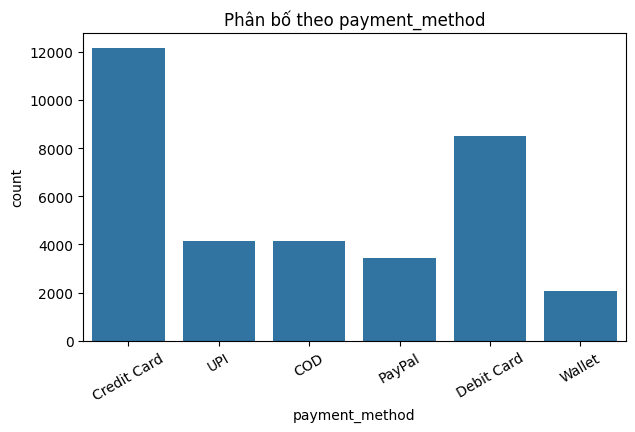

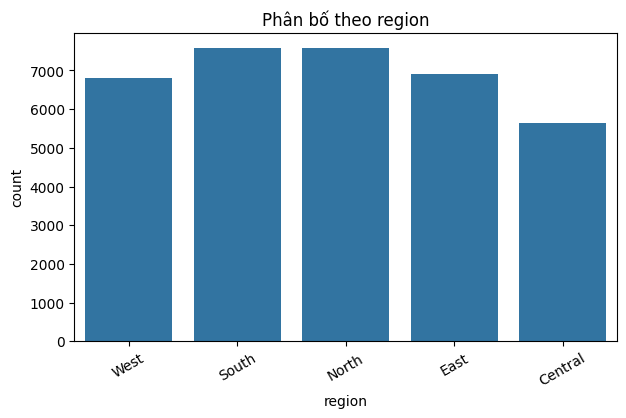

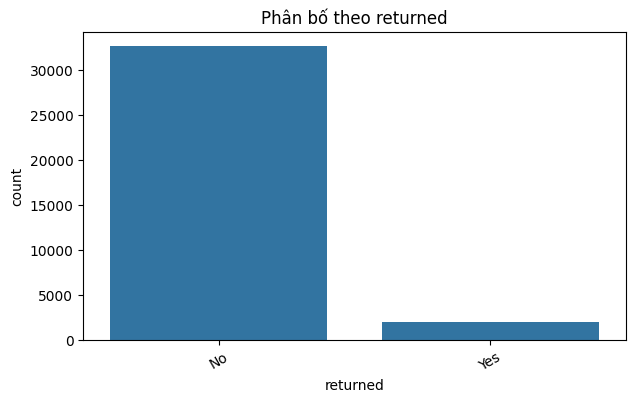

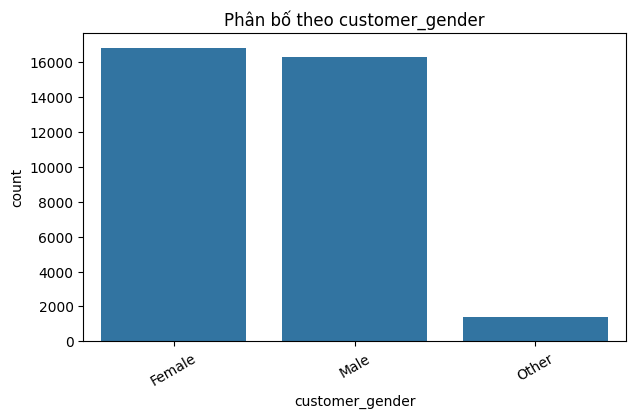

In [27]:
cat_cols = ['category', 'payment_method', 'region', 'returned', 'customer_gender']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, hue=None)
    plt.title(f"Phân bố theo {col}")
    plt.xticks(rotation=30)
    plt.show()


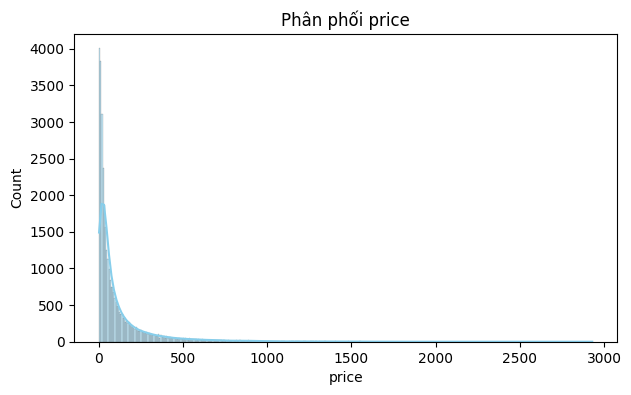

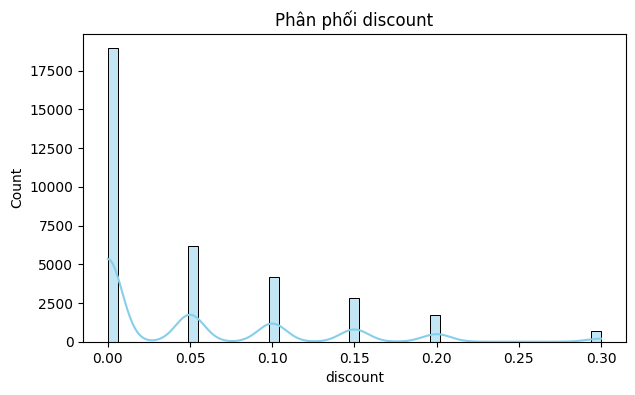

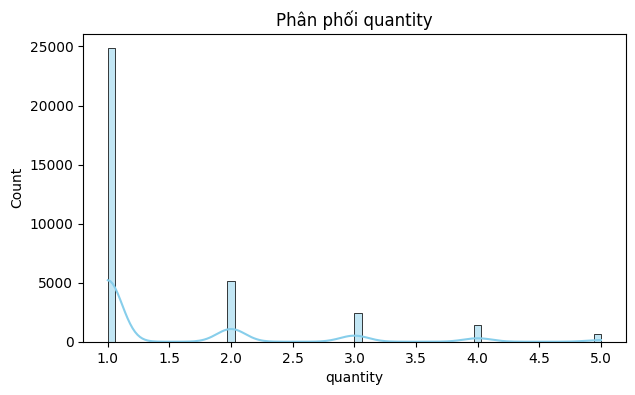

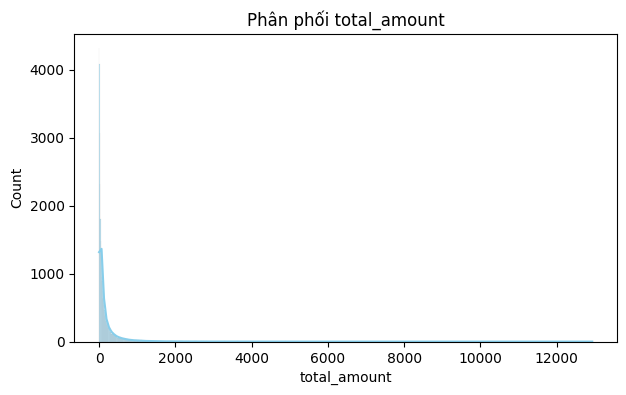

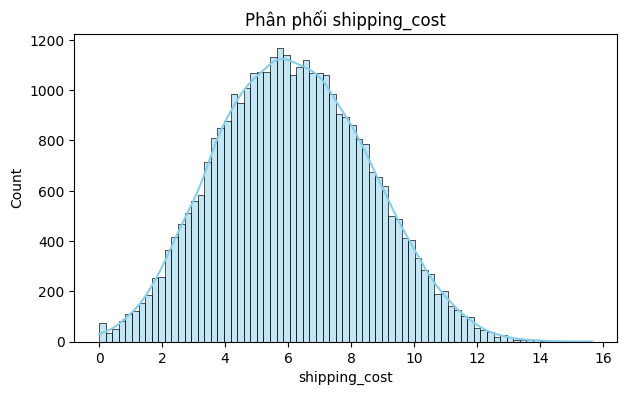

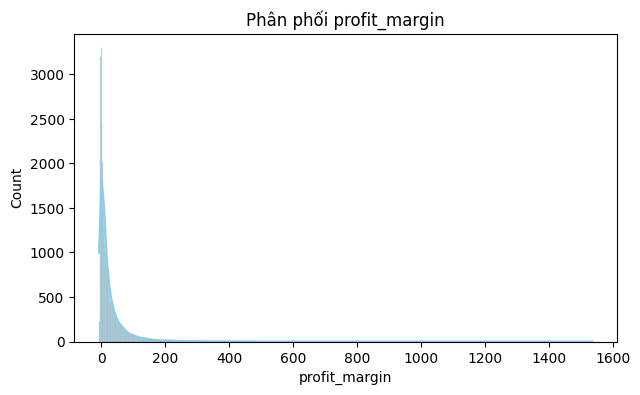

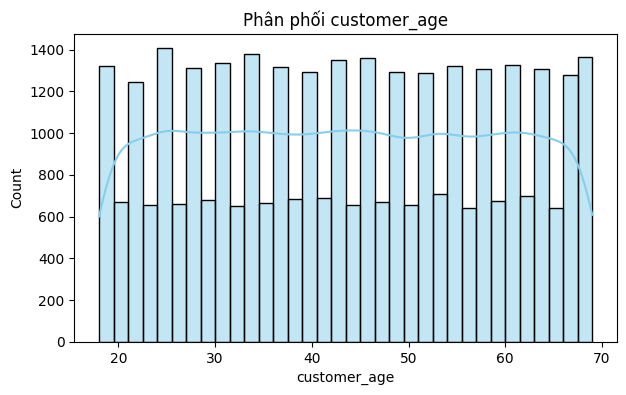

In [28]:
num_cols = ['price', 'discount', 'quantity', 'total_amount', 'shipping_cost', 'profit_margin', 'customer_age']

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Phân phối {col}")
    plt.show()

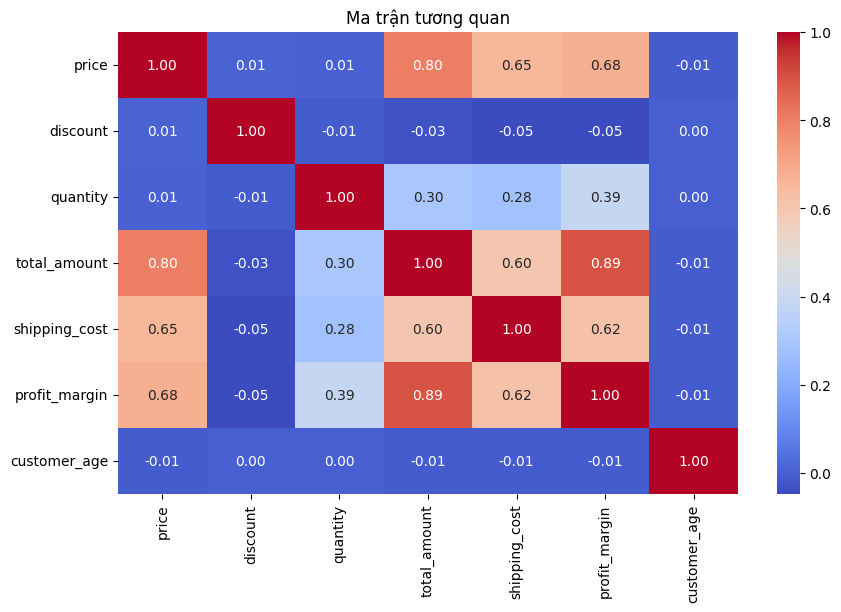

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan")
plt.show()


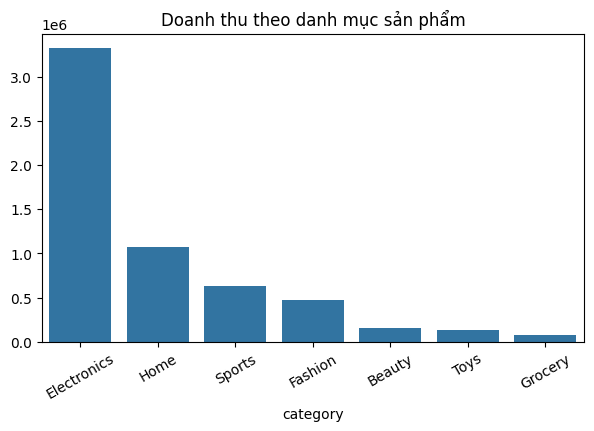

In [30]:
# Doanh thu theo danh mục
rev_cat = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=rev_cat.index, y=rev_cat.values)
plt.title("Doanh thu theo danh mục sản phẩm")
plt.xticks(rotation=30)
plt.show()

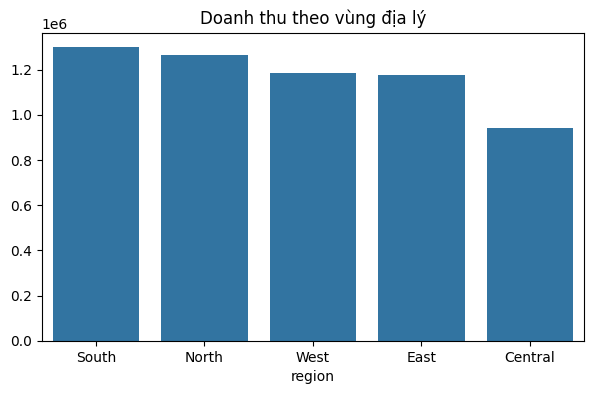

In [31]:
rev_region = df.groupby('region')['total_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=rev_region.index, y=rev_region.values)
plt.title("Doanh thu theo vùng địa lý")
plt.show()

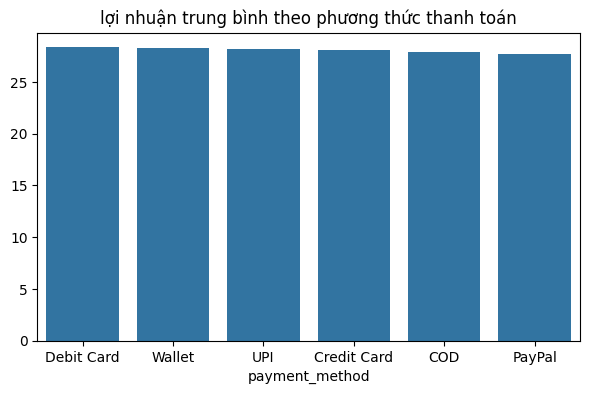

In [32]:
profit_pay = df.groupby('payment_method')['profit_margin'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=profit_pay.index, y=profit_pay.values)
plt.title("lợi nhuận trung bình theo phương thức thanh toán")
plt.show()

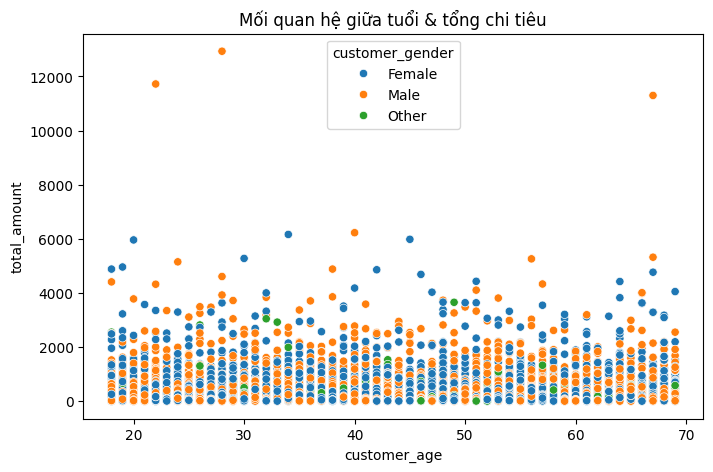

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='customer_age', y='total_amount', hue='customer_gender', data=df)
plt.title("Mối quan hệ giữa tuổi & tổng chi tiêu")
plt.show()

In [34]:

df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Kiểm tra lại
print(df['order_date'].dtypes)
print(df['order_date'].head())

df['month'] = df['order_date'].dt.to_period('M')
rev_month = df.groupby('month')['total_amount'].sum()

datetime64[ns]
0   2023-12-23
1   2025-04-03
2   2024-10-08
3   2024-09-14
4   2024-12-21
Name: order_date, dtype: datetime64[ns]


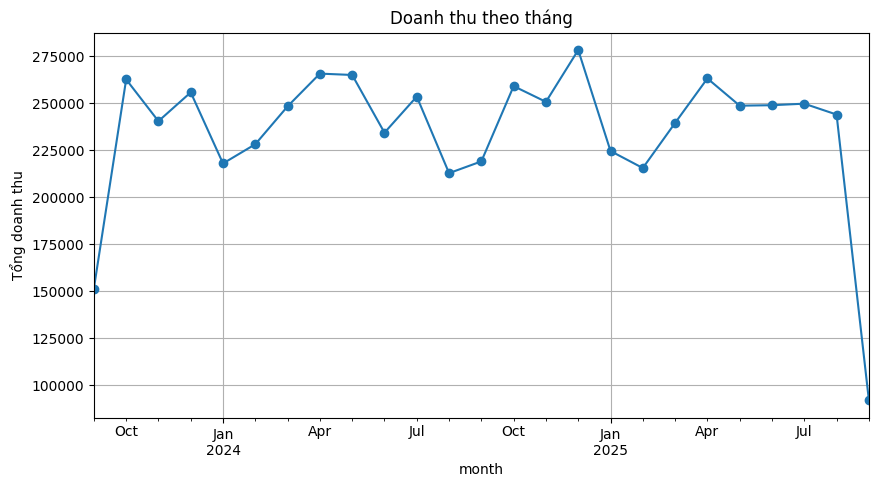

In [35]:
plt.figure(figsize=(10,5))
rev_month.plot(marker='o')
plt.title("Doanh thu theo tháng")
plt.ylabel("Tổng doanh thu")
plt.grid(True)
plt.show()


C:\Users\luan0\AppData\Local\Temp\ipykernel_9992\2166838450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='returned', data=df, palette='coolwarm')


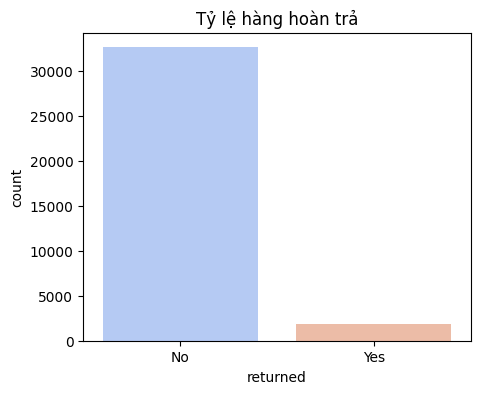

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(x='returned', data=df, palette='coolwarm')
plt.title("Tỷ lệ hàng hoàn trả")
plt.show()


In [37]:

print(f"Danh mục doanh thu cao nhất: {rev_cat.index[0]}")
print(f"Khu vực chi tiêu nhiều nhất: {rev_region.index[0]}")
print(f"Phương thức thanh toán sinh lợi cao nhất: {profit_pay.index[0]}")
print(f"Trung bình lợi nhuận biên: {df['profit_margin'].mean():.2f}")
print(f"Độ tuổi khách hàng trung bình: {df['customer_age'].mean():.1f}")

Danh mục doanh thu cao nhất: Electronics
Khu vực chi tiêu nhiều nhất: South
Phương thức thanh toán sinh lợi cao nhất: Debit Card
Trung bình lợi nhuận biên: 28.12
Độ tuổi khách hàng trung bình: 43.5


C:\Users\luan0\AppData\Local\Temp\ipykernel_9992\1670723967.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = df.groupby('age_group')['total_amount'].mean()
C:\Users\luan0\AppData\Local\Temp\ipykernel_9992\1670723967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_spend.index, y=age_spend.values, palette="viridis")


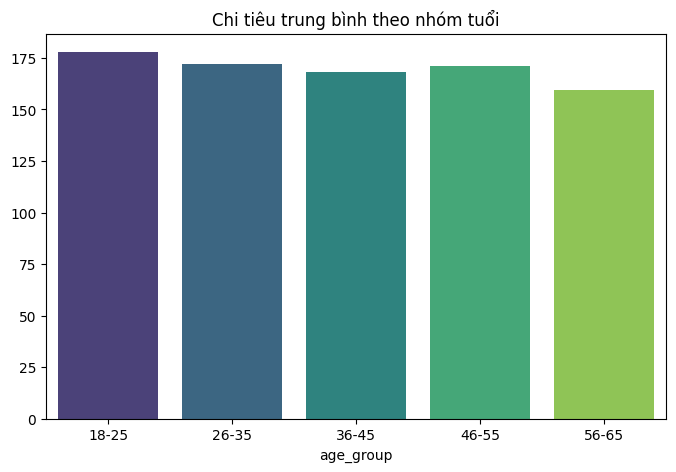

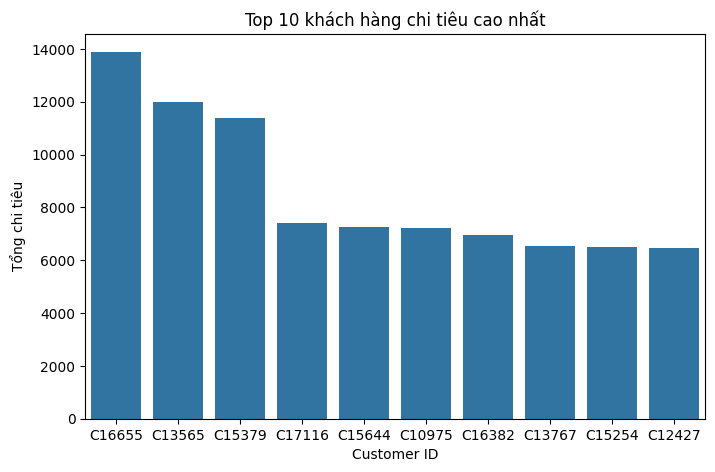

In [38]:


# Chi tiêu trung bình theo nhóm tuổi
df['age_group'] = pd.cut(df['customer_age'], bins=[18,25,35,45,55,65], labels=['18-25','26-35','36-45','46-55','56-65'])
age_spend = df.groupby('age_group')['total_amount'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=age_spend.index, y=age_spend.values, palette="viridis")
plt.title("Chi tiêu trung bình theo nhóm tuổi")
plt.show()

# Top 10 khách hàng chi tiêu cao nhất
top_customers = df.groupby('customer_id')['total_amount'].sum().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 10 khách hàng chi tiêu cao nhất")
plt.xlabel("Customer ID")
plt.ylabel("Tổng chi tiêu")
plt.show()


C:\Users\luan0\AppData\Local\Temp\ipykernel_9992\471537471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index.astype(str), y=top_products.values, palette='coolwarm')


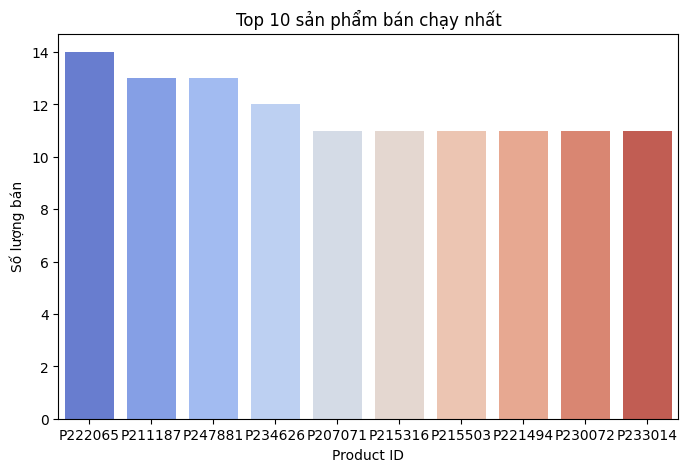

C:\Users\luan0\AppData\Local\Temp\ipykernel_9992\471537471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_category.index, y=profit_category.values, palette='crest')


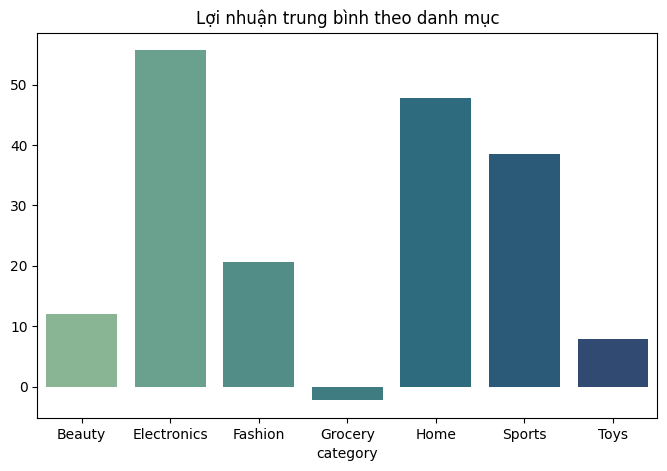

In [39]:

top_products = df.groupby('product_id')['quantity'].sum().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.index.astype(str), y=top_products.values, palette='coolwarm')
plt.title("Top 10 sản phẩm bán chạy nhất")
plt.xlabel("Product ID")
plt.ylabel("Số lượng bán")
plt.show()


profit_category = df.groupby('category')['profit_margin'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=profit_category.index, y=profit_category.values, palette='crest')
plt.title("Lợi nhuận trung bình theo danh mục")
plt.show()


C:\Users\luan0\AppData\Local\Temp\ipykernel_9992\2023802540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pay_rev.index, y=pay_rev.values, palette='Blues_d')


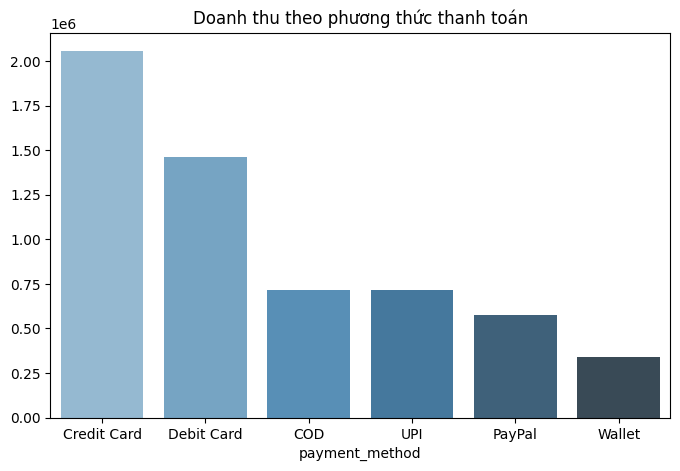

C:\Users\luan0\AppData\Local\Temp\ipykernel_9992\2023802540.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_pay.index, y=delivery_pay.values, palette='rocket')


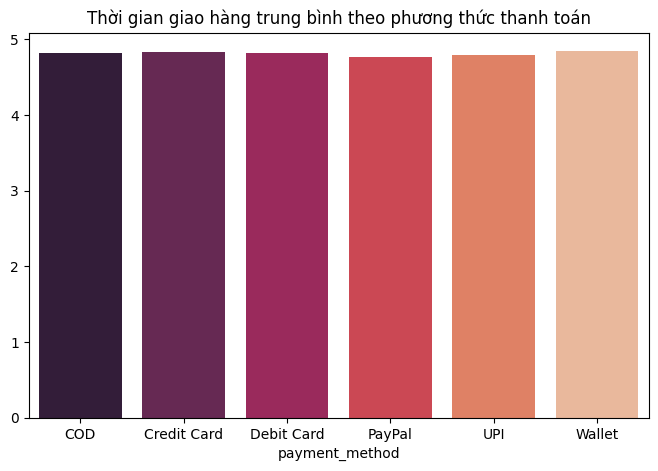

In [40]:
# Tổng doanh thu theo phương thức thanh toán
pay_rev = df.groupby('payment_method')['total_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=pay_rev.index, y=pay_rev.values, palette='Blues_d')
plt.title("Doanh thu theo phương thức thanh toán")
plt.show()

# Thời gian giao hàng trung bình theo phương thức thanh toán
delivery_pay = df.groupby('payment_method')['delivery_time_days'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=delivery_pay.index, y=delivery_pay.values, palette='rocket')
plt.title("Thời gian giao hàng trung bình theo phương thức thanh toán")
plt.show()


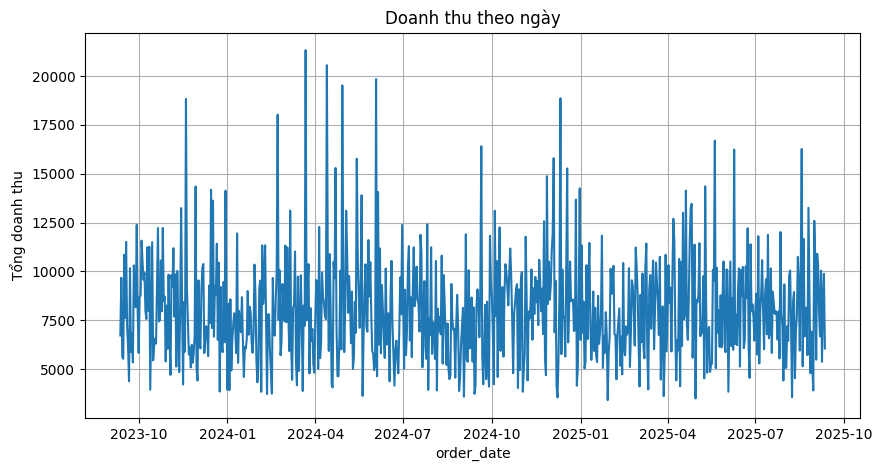

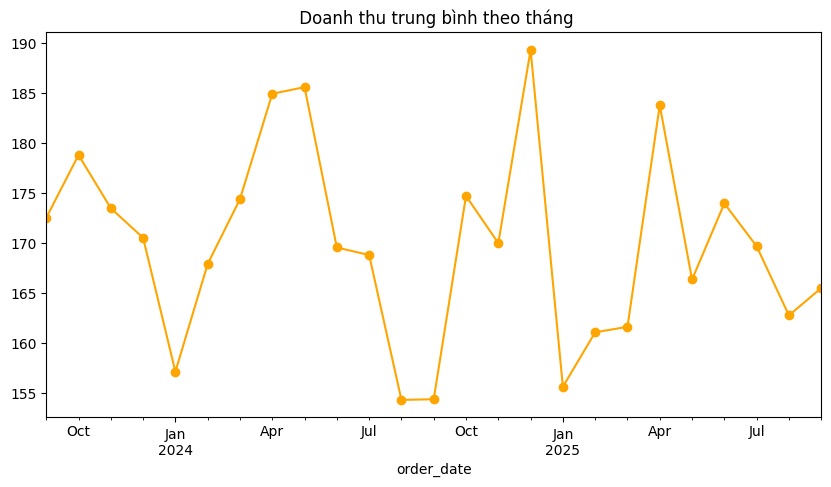

In [41]:
# Doanh thu theo ngày
daily_rev = df.groupby(df['order_date'].dt.date)['total_amount'].sum()
plt.figure(figsize=(10,5))
daily_rev.plot()
plt.title("Doanh thu theo ngày")
plt.ylabel("Tổng doanh thu")
plt.grid(True)
plt.show()

# Trung bình đơn hàng theo tháng
monthly_avg = df.groupby(df['order_date'].dt.to_period('M'))['total_amount'].mean()
plt.figure(figsize=(10,5))
monthly_avg.plot(marker='o', color='orange')
plt.title(" Doanh thu trung bình theo tháng")
plt.show()


C:\Users\luan0\AppData\Local\Temp\ipykernel_9992\2159969627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ret_by_pay.index, y=ret_by_pay.values, palette='magma')


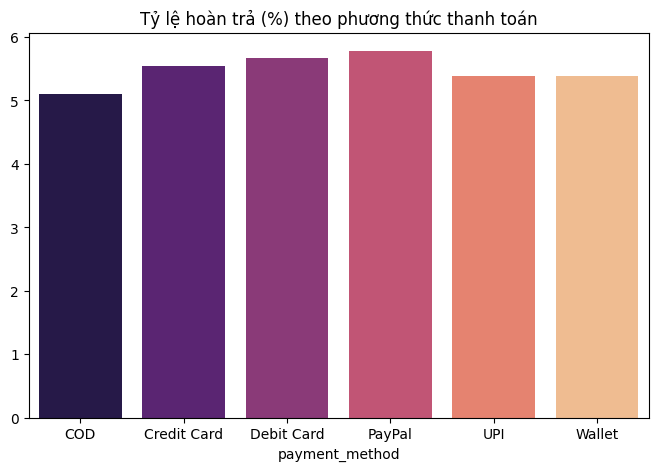

In [42]:

# Tỷ lệ hoàn trả theo phương thức thanh toán
ret_by_pay = df.groupby('payment_method')['returned'].apply(lambda x: (x=='Yes').mean()*100)
plt.figure(figsize=(8,5))
sns.barplot(x=ret_by_pay.index, y=ret_by_pay.values, palette='magma')
plt.title("Tỷ lệ hoàn trả (%) theo phương thức thanh toán")
plt.show()

# feature 